<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/2019%20Fastai%20Deep%20Learning/2019_Deep_Learning_3_NLP_tutorials_ULMFiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial on Text Classification (NLP) using ULMFiT and fastai Library in Python

# Introduction

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/11/DL-NLP.png)

Natural Language Processing (NLP) needs no introduction in today’s world. It’s one of the most important fields of study and research, and has seen a phenomenal rise in interest in the last decade. The basics of NLP are widely known and easy to grasp. But things start to get tricky when the text data becomes huge and unstructured.

That’s where deep learning becomes so pivotal. Yes, I’m talking about deep learning for NLP tasks – a still relatively less trodden path. DL has proven its usefulness in computer vision tasks like image detection, classification and segmentation, but NLP applications like text generation and classification have long been considered fit for traditional ML techniques.

And deep learning has certainly made a very positive impact in NLP, as you’ll see in this article. We will focus on the concept of transfer learning and how we can leverage it in NLP to build incredibly accurate models using the popular fastai library. I will introduce you to the ULMFiT framework as well in the process.

Note- This article assumes basic familiarity with neural networks, deep learning and transfer learning. If you are new to deep learning, I would strongly recommend reading the following articles first:

1. [An Introductory Guide to Deep Learning and Neural Networks](https://www.analyticsvidhya.com/blog/2018/10/introduction-neural-networks-deep-learning)
2. [A Complete Guide on Getting Started with Deep Learning in Python](https://www.analyticsvidhya.com/blog/2016/08/deep-learning-path/)

Table of Contents

1. The Advantage of Transfer Learning
2. Pre-trained Models in NLP
3. Overview of ULMFiT
3. Understanding the Problem Statement
4. System Setup: Google Colab
5. Implementation in Python
6. What’s Next?

#The Advantage of Transfer Learning

I praised deep learning in the introduction, and deservedly so. However, everything comes at a price, and deep learning is no different. The biggest challenge in deep learning is the massive data requirements for training the models. It is difficult to find datasets of such huge sizes, and it is way too costly to prepare such datasets. It’s simply not possible for most organizations to come up with them.

Another obstacle is the high cost of GPUs needed to run advanced deep learning algorithms.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/11/transfer_learning.jpg)

Thankfully, **we can use pre-trained state-of-the-art deep learning models and tweak them to work for us. This is known as transfer learning**. It is not as resource intensive as training a deep learning model from scratch and produces decent results even on small amounts of training data. This concept will be expanded upon later in the article when we implement our learning on quite a small dataset.



#Pre-trained Models in NLP

Pre-trained models help data scientists start off on a new problem by providing an existing framework they can leverage. You don’t always have to build a model from scratch, especially when someone else has already put in their hard work and effort! And these pre-trained models have proven to be truly effective and useful in the field of computer vision (check out this article to see our pick of the top 10 pre-trained models in CV).

Their success is popularly attributed to the Imagenet dataset. It has over 14 million labeled images with over 1 million images also accompanying bounding boxes. This dataset was first published in 2009 and has since become one of the most sought-after image datasets ever. It led to several breakthroughs in deep learning research for computer vision, with transfer learning being one of them.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/11/Screenshot_2018-11-28-3-Getting-Started-with-Pre-trained-Models-on-ImageNet-%E2%80%94-gluoncv-0-4-0-documentation.png)

However, in NLP, transfer learning has not been as successful (as compared to computer vision, anyway). Of course we have pre-trained word embeddings like word2vec, GloVe, and fastText, but they are primarily used to initialize only the first layer of a neural network. The rest of the model still needs to be trained from scratch and it requires a huge number of examples to produce a good performance.

What do we really need in this case? Like the aforementioned computer vision models, we require a pre-trained model for NLP which can be fine-tuned and used on different text datasets. One of the contenders for pre-trained natural language models is the Universal Language Model Fine-tuning for Text Classification, or ULMFiT (Imagenet dataset [cs.CL]).

How does it work? How widespread are it’s applications? How can we make it work in Python? In the rest of this article, we will put ULMFiT to the test by solving a text classification problem and check how well it performs.

#Overview of ULMFiT

Proposed by fast.ai’s Jeremy Howard and NUI Galway Insight Center’s Sebastian Ruder, ULMFiT is essentially a method to enable transfer learning for any NLP task and achieve great results. All this, without having to train models from scratch. That got your attention, didn’t it?

ULMFiT achieves state-of-the-art result using novel techniques like:

- Discriminative fine-tuning
- Slanted triangular learning rates, and
- Gradual unfreezing

This method involves fine-tuning a pre-trained language model (LM), trained on the Wikitext 103 dataset, to a new dataset in such a manner that it does not forget what it previously learned.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/11/ulmfit_flow_2.png)

#Problem Statement

Alright, enough theoretical concepts – let’s get our hands dirty by implementing ULMFiT on a dataset and see what the hype is all about.

Our objective here is to fine-tune a pre-trained model and use it for text classification on a new dataset. We will implement ULMFiT in this process. The interesting thing here is that this new data is quite small in size (<1000 labeled instances). A neural network model trained from scratch would overfit on such a small dataset. Hence, I would like to see whether ULMFiT does a great job at this task as promised in the paper.

**Dataset: We will use the 20 Newsgroup dataset available in sklearn.datasets**. As the name suggests, it includes text documents from 20 different newsgroups.

In [0]:
from fastai.text import *

In [0]:
from sklearn.datasets import fetch_20newsgroups

dataset=fetch_20newsgroups(shuffle=True,random_state=1,remove=('headers','footers','quotes'))

documents=dataset.data


In [7]:
df = pd.DataFrame({'label':dataset.target,'text':dataset.data})
df.head()

,label,text
0,17,Well i'm not sure about the story nad it did s...
1,0,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,17,Although I realize that principle is not one o...
3,11,Notwithstanding all the legitimate fuss about ...
4,10,"Well, I will have to change the scoring on my ..."


We’ll convert this into a binary classification problem by selecting only 2 out of the 20 labels present in the dataset. We will select labels 1 and 10 which correspond to ‘comp.graphics’ and ‘rec.sport.hockey’, respectively.

##1. Choose binary label

In [0]:
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop=True)

Let’s have a quick look at the target distribution.

In [9]:
df.label.value_counts()

10    600
1     584
Name: label, dtype: int64

The distribution looks pretty even. Accuracy would be a good evaluation metric to use in this case.

###Data Preprocessing

It’s always a good practice to feed clean data to your models, especially when the data comes in the form of unstructured text. Let’s clean our text by retaining only alphabets and removing everything else

-------------------------------------------------

When we deal with text problem in Natural Language Processing, stop words removal process is a one of the important step to have a better input for any models. **Stop words means that it is a very common words in a language (e.g. a, an, the in English. 的, 了 in Chinese. え, も in Japanese)**. It does not help on most of NLP problem such as semantic analysis, classification etc.

In this article, we will look into using multi libraries pre-defined stop words, third party pre-defined stop words as well as domain specific stop words. Definition of stop words (capture from wiki) will be used to demonstrate the result after removing stop words.

Word tokenization and lemmatization are the essential part for removing stop words. You may refer to articles to understand [word tokenization](https://medium.com/@makcedward/nlp-pipeline-word-tokenization-part-1-4b2b547e6a3) and [lemmatization](https://medium.com/@makcedward/nlp-pipeline-lemmatization-part-3-4bfd7304957).



In [0]:
df['text'] = df['text'].str.replace('[^a-zA-Z]'," ")

Now, we will get rid of the stopwords from our text data. If you have never used stopwords before, then you will have to download them from the nltk package as I’ve shown below:

In [11]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# tokenization

tokenized_doc = df['text'].apply(lambda x:x.split())


In [0]:
#remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x:[item for item in x if item not in stop_words])

In [0]:
# de_tokenization
detokenized_doc =[]
for i in range(len(df)):
    t =' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
df['text'] = detokenized_doc

###Language model data



In [0]:
path ='/content/'

In [0]:
data_lm = (TextList.from_df(df,cols='text')
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=48))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path,'data_lm.pkl',bs=48)

In [20]:
data_lm.show_batch()

idx,text
0,computer xxmaj graphics xxmaj resource xxmaj listing xxup weekly xxup posting xxup part xxmaj last xxmaj change xxmaj april xxmaj many faqs including xxmaj listing available archive site pit manager mit edu alias rtfm mit edu directory pub usenet news answers xxmaj the name xxup faq archived appears xxmaj archive name line top article xxmaj this xxup faq archived graphics resources list part xxmaj there mail server machine xxmaj you
1,xdart xxmaj mark xxmaj xxunk xxunk xxunk xxunk wisc edu sgi com graphics tiff xxup tiff spec xxup libtiff software pics xxmaj also much xxup sgi xxup gl related stuff e g opengl xxunk xxmaj sam xxmaj xxunk sam sgi com xxunk xxunk berkeley edu xxup libtiff stuff xxunk waterloo edu graphics xxup fbm ray tracers ftp sdsc edu xxunk xxup sdsc ftp brl mil brl cad information get xxup
2,it based xxmaj non xxmaj xxunk xxmaj xxunk xxmaj ask info i know give away xxup xyz xxup xyz interactive d editor builder written xxmaj dale p xxmaj xxunk create objects xxunk xxmaj xxunk xxup dkb raytracer packages xxup xyz free found example xxup simtel xxup msdos xxup xxunk xxup xyz xxup zip xxup dos xxup dmod xxmaj it xxup msdos program xxmaj check xxunk xxunk clarkson edu pub msdos
3,xxmaj we need point q normal xxup eq xxup xxunk xxmaj but intersection perpendicular bisector xxup ed normal point exists since d plane xxup abc xxup ed right angles normal xxmaj algorithm xxmaj is sphere well defined xxmaj check a b xxunk failure xxmaj find line xxup ab check c lie failure xxmaj find plane xxup abc check d lie failure xxmaj yes xxmaj find centre xxmaj find perpendicular xxunk
4,put win first tie breaker xxbos xxmaj about correct xxmaj numminen xxmaj lumme xxmaj no xxmaj kurri points low xxmaj kurri xxmaj sel nne xxmaj that true xxmaj game different xxmaj europe compared xxup nhl xxmaj north xxunk xxunk better small rinks europeans large rinks xxmaj an average european player xxmaj sweden xxmaj finland xxmaj russian xxmaj xxunk xxmaj slovakia better skater xxunk xxup nhl xxunk xxmaj especially defenders xxup


In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


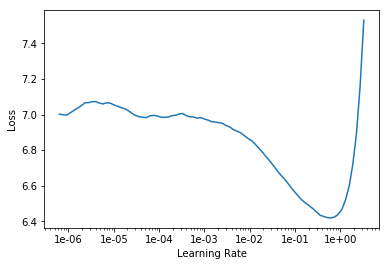

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(4,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.205226,5.437816,0.216369,00:07
1,5.292873,5.019585,0.237599,00:07
2,4.668279,4.920980,0.238095,00:07
3,4.264121,4.926503,0.240873,00:07


In [0]:
learn.unfreeze()

In [30]:
learn.fit_one_cycle(4,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.143395,4.863260,0.236905,00:09
1,4.019455,4.710302,0.247817,00:09
2,3.491071,4.720044,0.251389,00:09
3,2.766342,4.825452,0.258036,00:09


In [0]:
learn.save_encoder('fine_tuned_enc')

###Text Classfification



In [0]:
data_clas= (TextList.from_df(df,cols='text',vocab=data_lm.vocab)
           .split_subsets(train_size=0.6,valid_size=0.4)
           .label_from_df(cols='label')
           .databunch(bs=48))
data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path,'data_clas.pkl',bs=48)

In [54]:
data_clas.show_batch(20)

text,target
xxbos xxmaj archive name hockey faq rec sport hockey answers xxmaj frequently xxmaj asked xxmaj questions news xxmaj contents xxmaj new xxmaj info xxup nhl xxup nhl xxmaj minor xxmaj leagues xxmaj college xxmaj hockey xxmaj north xxmaj america xxmaj other leagues e g xxmaj europe xxmaj canada xxmaj cup tournament e mail files xxup usenet xxmaj hockey xxmaj pool xxmaj up coming xxmaj dates xxmaj answers frequently asked questions,10
xxbos xxmaj archive name graphics resources list part xxmaj last modified xxmaj computer xxmaj graphics xxmaj resource xxmaj listing xxup weekly xxup posting xxup part xxmaj last xxmaj change xxmaj april xxmaj many faqs including xxmaj listing available archive site pit manager mit edu alias rtfm mit edu directory pub usenet news answers xxmaj the name xxup faq archived appears xxmaj archive name line top article xxmaj this xxup faq,1
xxbos xxmaj archive name graphics resources list part xxmaj last modified xxmaj computer xxmaj graphics xxmaj resource xxmaj listing xxup weekly xxup posting xxup part xxmaj last xxmaj change xxmaj april xxmaj scene generators geographical data xxmaj maps xxmaj data files dems xxmaj digital xxmaj elevation xxmaj models dems xxmaj digital xxmaj elevation xxmaj models well cartographic data huge available spectrum xerox com pub map xxmaj contact xxmaj lee xxmaj,1
xxbos xxmaj archive name jpeg faq xxmaj last modified xxmaj april xxmaj this xxup faq article xxunk xxup jpeg image compression xxmaj suggestions additions xxunk welcome xxmaj new since version xxmaj april xxmaj new versions xxmaj image xxmaj xxunk xxup pmjpeg xxup os xxmaj this article includes following sections xxmaj what xxup jpeg xxmaj why use xxup jpeg xxmaj when i use xxup jpeg i stick xxup gif xxmaj how,1
xxbos xxmaj archive name graphics resources list part xxmaj last modified xxmaj computer xxmaj graphics xxmaj resource xxmaj listing xxup weekly xxup posting xxup part xxmaj last xxmaj change xxmaj april xxmaj plotting packages xxmaj gnuplot xxmaj it one best d plotting packages online help xxmaj it command line driven interactive function plotting utility xxup unix xxup msdos xxmaj amiga xxmaj archimedes xxup vms platforms least xxmaj freely distributed supports,1
xxbos xxmaj individual leaders total points xxmaj final standings xxup note xxmaj games played points per games accurate xxmaj player xxmaj team xxup gp g a xxmaj pts ppg xxmaj prj xxup pim m xxmaj lemieux xxup pit lafontaine xxup buf xxmaj oates xxup bos xxmaj yzerman xxup det xxmaj turgeon xxup nyi xxmaj selanne xxup win xxmaj mogilny xxup buf xxmaj gilmour xxup tor xxmaj robitaille xxup la xxmaj,10
xxbos xxmaj the xxup flyers xxunk lead xxmaj buffalo xxmaj sabres second period xxmaj kevin xxmaj dineen th career hat trick xxunk th consecutive win xxmaj sabres lost row xxmaj alexander xxmaj mogilny led xxunk scoring th th goals season tied game nd period rd xxmaj tommy xxmaj soderstrom stopped shots goal improve record tested xxmaj mogilny lafontaine night xxmaj roster move xxmaj andre xxmaj faust recalled xxmaj hershey xxmaj,10
xxbos xxmaj here price list week xxmaj april xxmaj april xxmaj andrew xxmaj buy xxmaj sell xxmaj pts xxmaj team xxmaj player xxup pit xxmaj mario xxmaj lemieux xxup buf xxmaj pat lafontaine xxup bos xxmaj adam xxmaj oates xxup det xxmaj steve xxmaj yzerman xxup wpg xxmaj teemu xxmaj selanne xxup tor xxmaj doug xxmaj gilmour xxup nyi xxmaj pierre xxmaj turgeon xxup buf xxmaj alexander xxmaj mogilny xxup,10
xxbos xxmaj the xxup flyers team beat team night showed xxmaj spectrum xxmaj sunday night dominated xxmaj maple xxmaj leafs thoroughly en route shutout xxmaj tommy xxmaj soderstrom get credit shutout barely broke xxunk third period xxup flyers defense kept xxmaj leafs xxunk serious attack xxmaj injuries xxmaj pelle xxmaj eklund day day xxunk xxunk xxmaj roster xxmaj moves xxmaj jason xxmaj bowen added lineup first xxup nhl game xxmaj,10
xxbos xxmaj los xxmaj angeles xxmaj kings notes game reports xxmaj k

In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


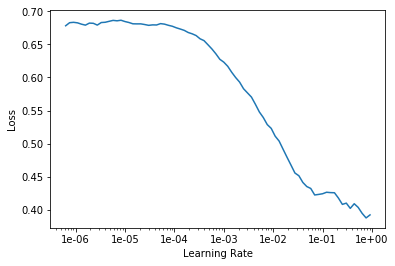

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(4,1e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.564962,0.589072,0.923890,00:15
1,0.406293,0.305541,0.947146,00:16
2,0.331481,0.202541,0.947146,00:16
3,0.286506,0.177882,0.949260,00:15


###Prediction

In [0]:
news='The 2018 No. 2 overall pick by the Hurricanes was knocked out by Ovechkin in Game 3 when he took three hard rights from the Washington veteran and subsequently hit the back of his head on the ice when he fell.He was put into concussion protocol and missed the rest of Game 3 as well as Game 4 as a result.He is hoping to return for Game 6 and made sure to reiterate he was not on the ice looking to drop gloves with his hero.He did ask me first for a fight, Svechnikov said.He continued: It was just back and forth all series, you know. It was just, like, fight. It sometimes happens. I just stood up for myself.The Hurricanes started the series off down 2-0 to Washington but won both Games 3 and 4 on home ice.If Svechnikov is able to return for Game 6 - the final home game in the series for Carolina - it would be a big boost for this bunch of jerks.I feel very good and I hope to play next game, well see, Svechnikov said.Game 5 is scheduled to be played at 8 p.m. ET in Washington on Saturday.Svechnikov was on the ice for the morning skate but he was in a yellow no-contact jersey so he has been ruled out for the contest.'

In [61]:
learn.predict(news)

(Category 10, tensor(1), tensor([0.0367, 0.9633]))

##2. Multilabel Classification

In [62]:
df = pd.DataFrame({'label':dataset.target,'text':dataset.data})
df.head()

,label,text
0,17,Well i'm not sure about the story nad it did s...
1,0,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,17,Although I realize that principle is not one o...
3,11,Notwithstanding all the legitimate fuss about ...
4,10,"Well, I will have to change the scoring on my ..."


###Language Model

In [0]:
data_lm = (TextList.from_df(df,cols='text')
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=48))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path,'data_lm.pkl',bs=48)

In [67]:
data_lm.show_batch()

idx,text
0,realize that incidences such as the one described in the \n letter have occured . xxmaj the xxup u.s. media as a whole seem to try to \n ignore them . xxmaj the xxup u.s. is subsidizing xxmaj israels existance and the \n xxmaj europeans are not ( at least not to the same degree ) . xxmaj so i think \n that might be a
1,"claim of $ 250.00 . xxmaj could you imagine trying to get your \n monitor or mother board fixed for $ 250.00 ? xxmaj amex has xxup no limit on claims . \n \n xxmaj remember , if you use xxmaj amex , you must either send a copy of the warranty info \n to them in 30 days from purchase , or you must call them"
2,") say . xxmaj by the same token , therefore , xxmaj santa \n xxmaj claus delivers toys every xmas . xxmaj do n't you see ? i have xxup no xxup reason to \n believe that what you say is true . xxmaj please give me some reason that i \n ca n't similarly apply to xxmaj santa xxmaj claus . \n \n \n i"
3,"go back and check what xxunk idiot xxmaj purdy \n \t said in his column . xxmaj that ought to be worth a few xxmaj leafs , i \n \t mean xxmaj xxunk . xxmaj if i 'm really depressed i 'll read the xxup sf xxmaj xxunk . \n \n \t mark \n \n just say xxbos xxmaj here are some recent observations taken by the xxmaj hubble"
4,"se - r or xxmaj saturn \n will run in the 15 's ? xxmaj do n't you think it is kind of strange that your \n xxunk sports car is so easily beaten . \n \n a xxmaj mustang 5.0 , which weights about the same ( according to * your * numbers ) , \n has less power and is much quicker ? xxmaj"


In [68]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


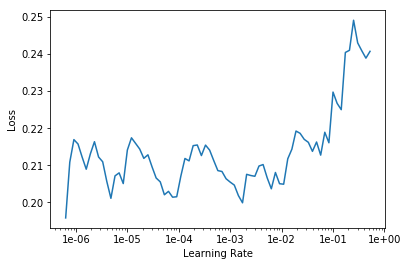

In [69]:
learn.recorder.plot()

In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

In [76]:
learn.fit_one_cycle(1,slice(1e-2,1e-1),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.169387,4.946054,0.205282,03:30


####Language Model prediction

In [0]:
TEXT='team was knocked out by Ovechkin in Game 3'
N_WORDS = 60
N_SENTENCES=1

In [78]:
print('\n'.join(learn.predict(TEXT,N_WORDS,temperature=0.75) for _ in range(N_SENTENCES) ))

team was knocked out by Ovechkin in Game 3 years ago . If the OSF 
  Armenia said , 
  Boolean , ' 
  Braves High Full Eastern Survival Head , explanations 
  To the Jews 
  and Christian Computer Western Azerbaijan , Is The Always . If


In [0]:
learn.save_encoder('fine_tuned_enc')

###Text Classification



In [0]:
data_clas = (TextList.from_df(df,cols='text',vocab=data_lm.vocab)
            .split_subsets(train_size=0.8,valid_size=0.2)
            .label_from_df(cols='label')
            .databunch(bs=48))
data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path,'data_clas.pkl',bs=48)

In [84]:
data_clas.show_batch()

text,target
xxbos xxmaj due to the resolution and size it is in 14 parts . \n \n xxmaj this is a uuencoded bitmap . xxup xxunk 256 colors . \n xxmaj the picture is a xxunk xxunk on a desert with blue sky background . \n xxmaj the size is just right for centered wallpaper on a 1024x768 display \n because it leaves a border at the,2
"xxbos \n xxrep 12 - xxmaj part 2 of 14 xxrep 12 - \n xxup m0 . / xxup xxunk / xxup cbn / xxup xxunk / xxup xxunk , xxup xxunk , xxup xxunk [ \n xxup xxunk \ _ -8 \n xxup my _ / xxup sys * / xxup xxunk \ xxup xxunk > / xxup c^ > / xxup cx_s \ xxup",2
"xxbos \n xxrep 12 - xxmaj part 6 of 14 xxrep 12 - \n xxup xxunk ) \ & xxup xxunk > ' \n xxup xxunk \ , xxup xxunk , # "" , xxup xxunk # 6 # , xxup xxunk > ' \n xxup max > ' xxwrep 2 xxup ax > ' xxup xxunk # xxup mh \n xxup xxunk & '",2
xxbos \n \n xxrep 12 - xxmaj part 13 of 14 xxrep 12 - \n xxup mtm ( ] / xxup xxunk > xxup xxunk + \n xxup xxunk # & ' xxwrep 2 xxup ax > ' \n xxup max > ' xxwrep 2 xxup ax > ' \n xxup max > ' xxwrep 2 xxup ax > ' \n xxup max >,2
xxbos xxmaj archive - name : graphics / resources - list / part2 \n xxmaj last - modified : 1993 / 04 / 17 \n \n \n xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly xxup posting [ xxup part 2 / 3 ] \n xxrep 51 = \n xxmaj last xxmaj change : 17 xxmaj april 1993 \n \n \n 14,1


In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


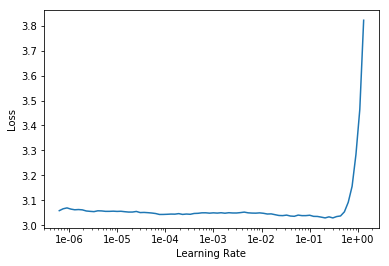

In [86]:
learn.lr_find()
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(1,slice(1e-5,1e-1),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.910180,2.808024,0.126437,03:43


### Minor tweak : remove stopwords before running model

In [0]:
df['text'] = df['text'].str.replace('[^a-zA-Z]',' ')

In [0]:
# tokenization
tokenized_doc = df['text'].apply(lambda x: x.split())

In [0]:
# remove stopwords
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [0]:
# de- tokenization
detokenized_doc = []
for i in range(len(df)):
    t =' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['text'] = detokenized_doc

***Language model***

In [0]:
data_lm = (TextList.from_df(df,cols='text')
          .split_by_rand_pct(0.2)
          .label_for_lm()
          .databunch(bs=48))
data_lm.save('data_lm.pkl')

In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


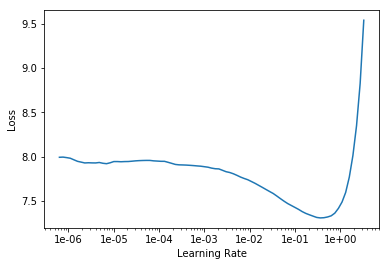

In [97]:
learn.lr_find()
learn.recorder.plot()

In [99]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.833906,5.289324,0.241532,01:41


In [0]:
learn.save_encoder('fine_tuned_enc')

***Text classification***

In [0]:
data_clas= (TextList.from_df(df,cols='text',vocab=data_lm.vocab)
         .split_subsets(train_size=0.6,valid_size=0.4)
         .label_from_df(cols='label')
         .databunch(bs=48))

In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


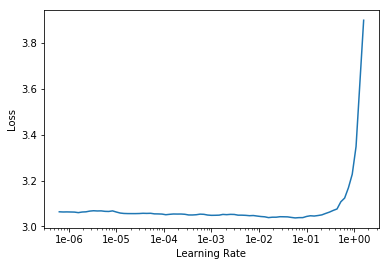

In [114]:
learn.lr_find()
learn.recorder.plot()

In [115]:
learn.fit_one_cycle(1,slice(1e-5,1e-1),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.023536,3.837618,0.040663,02:13


#Conclusion: 

do best when do binary classification while performance of multilabel classification really bad